In [3]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from google.colab import files


In [4]:
upload=files.upload()

df = pd.read_csv('titanic.csv', usecols=['age','fare','survived'])
df.head()

Saving titanic.csv to titanic (1).csv


,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum() #missing values

survived      0
age         177
fare          0
dtype: int64

In [6]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [7]:
df['age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [8]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [9]:
x

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [10]:
#Feature Engeneering Train Test Split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

<ipython-input-12-d6560e84342e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'])


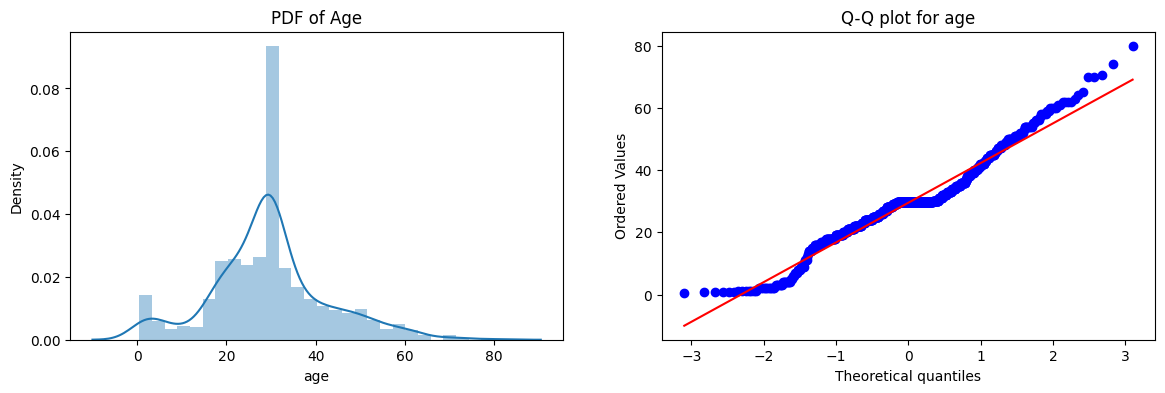

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['age'])
#sns.histplot(X_train['age'], kde=True, element='step')
plt.title('PDF of Age')

plt.subplot(1,2,2)
stats.probplot(X_train['age'],dist='norm',plot=plt)
plt.title('Q-Q plot for age')

plt.show()

<ipython-input-13-0f010ec6a3d5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['fare'])


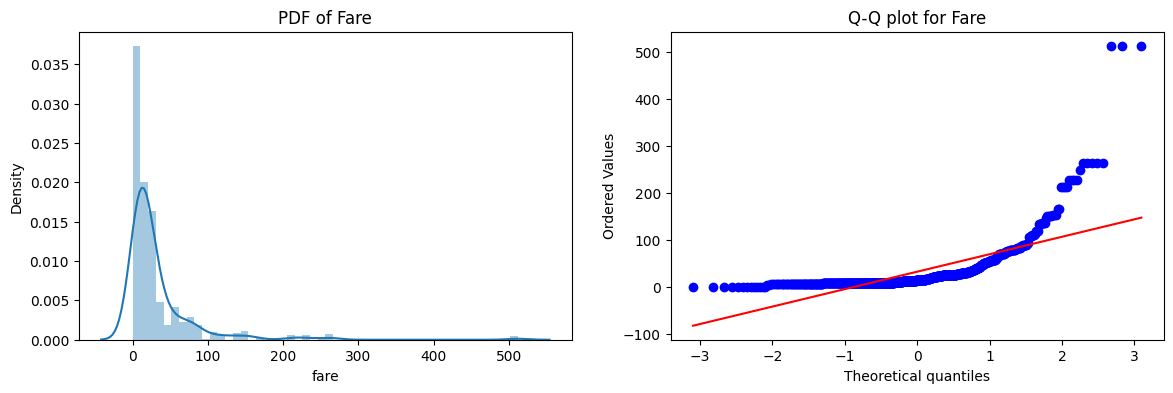

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['fare'])
#sns.histplot(X_train['age'], kde=True, element='step')
plt.title('PDF of Fare')

plt.subplot(1,2,2)
stats.probplot(X_train['fare'],dist='norm',plot=plt)
plt.title('Q-Q plot for Fare')

plt.show()

In [14]:
#Make Classifier
clf=LogisticRegression()
clf1=DecisionTreeClassifier()

In [16]:
#fit Data into Classifier
clf.fit(X_train,y_train)
clf1.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
#predict y data from train and test model
y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)

In [18]:
print("Accuracy of LR",accuracy_score(y_test,y_pred))
print("Accuracy of DT",accuracy_score(y_test,y_pred1))


Accuracy of LR 0.6480446927374302
Accuracy of DT 0.6871508379888268


In [19]:
#Transfrom into Normal Distribution

In [20]:
trf = FunctionTransformer(func=np.log1p)

In [21]:
#fit data into trf data

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)


In [23]:
# Agin Make Classifier for transformed data
clf=LogisticRegression()
clf1=DecisionTreeClassifier()

#fit Data into Classifier
clf.fit(X_train_transformed,y_train)
clf1.fit(X_train_transformed,y_train)

#predict y data from train and test model
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf1.predict(X_test_transformed)

print("Accuracy of LR",accuracy_score(y_test,y_pred))
print("Accuracy of DT",accuracy_score(y_test,y_pred1))


Accuracy of LR 0.6815642458100558
Accuracy of DT 0.664804469273743


In [25]:
#Cross Validation

X_transformed = trf.fit_transform(x)
clf=LogisticRegression()
clf1=DecisionTreeClassifier()
#cross val score --> 10 times train_test split --> everytime get accuracy --> calculate mean of accuracy
print("Accuracy of LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy', cv=10)))
print("Accuracy of DT",np.mean(cross_val_score(clf1,X_transformed,y,scoring='accuracy', cv=10)))

Accuracy of LR 0.678027465667915
Accuracy of DT 0.6678277153558052


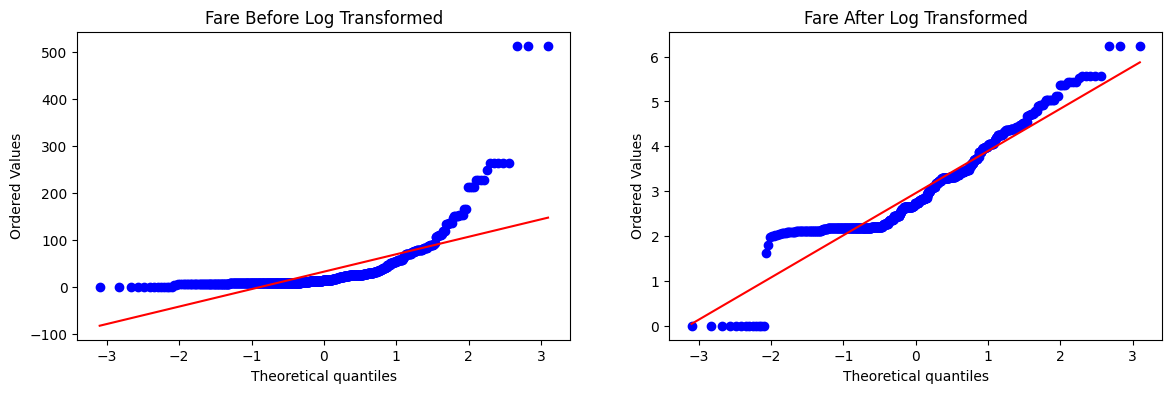

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
#sns.distplot(X_train['fare'])
#sns.histplot(X_train['age'], kde=True, element='step')
stats.probplot(X_train['fare'],dist='norm',plot=plt)

plt.title('Fare Before Log Transformed')

plt.subplot(1,2,2)
stats.probplot(X_train_transformed['fare'],dist='norm',plot=plt)
plt.title('Fare After Log Transformed')

plt.show()

<ipython-input-31-7daf7c1851ee>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['fare'])
<ipython-input-31-7daf7c1851ee>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['fare'])


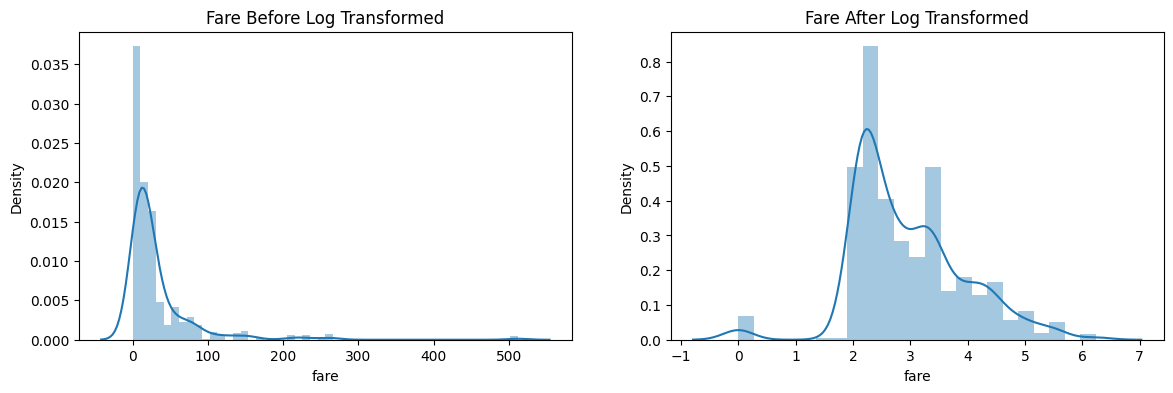

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['fare'])
#sns.histplot(X_train['age'], kde=True, element='step')
#stats.probplot(X_train['fare'],dist='norm',plot=plt)

plt.title('Fare Before Log Transformed')

plt.subplot(1,2,2)
sns.distplot(X_train_transformed['fare'])
#stats.probplot(X_train_transformed['fare'],dist='norm',plot=plt)
plt.title('Fare After Log Transformed')

plt.show()

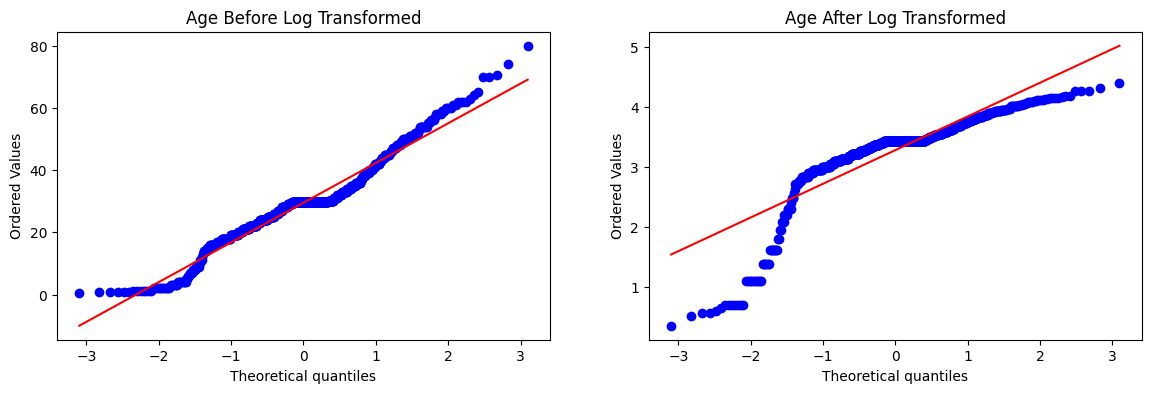

In [28]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
#sns.distplot(X_train['fare'])
#sns.histplot(X_train['age'], kde=True, element='step')
stats.probplot(X_train['age'],dist='norm',plot=plt)

plt.title('Age Before Log Transformed')

plt.subplot(1,2,2)
stats.probplot(X_train_transformed['age'],dist='norm',plot=plt)
plt.title('Age After Log Transformed')

plt.show()

In [30]:
#so above age graph result are not better !!

In [32]:
#applay transform only one column --> Fare because they give better result
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['fare'])], remainder='passthrough')

#fit data into trf data

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.fit_transform(X_test)


In [33]:
# Agin Make Classifier for transformed data
clf=LogisticRegression()
clf1=DecisionTreeClassifier()

#fit Data into Classifier
clf.fit(X_train_transformed2,y_train)
clf1.fit(X_train_transformed2,y_train)

#predict y data from train and test model
y_pred = clf.predict(X_test_transformed2)
y_pred1 = clf1.predict(X_test_transformed2)

print("Accuracy of LR",accuracy_score(y_test,y_pred))
print("Accuracy of DT",accuracy_score(y_test,y_pred1))


Accuracy of LR 0.6703910614525139
Accuracy of DT 0.6703910614525139


In [35]:
# again Cross Validation

X_transformed2 = trf2.fit_transform(x)
clf=LogisticRegression()
clf1=DecisionTreeClassifier()
#cross val score --> 10 times train_test split --> everytime get accuracy --> calculate mean of accuracy
print("Accuracy of LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy', cv=10)))
print("Accuracy of DT",np.mean(cross_val_score(clf1,X_transformed2,y,scoring='accuracy', cv=10)))

#decision tree are those algorithm they dosent mattar about data abd are those distribution
#linear regression and Logistic Regression are those algorithms, they are mattar about those data and those distribution

Accuracy of LR 0.6712609238451936
Accuracy of DT 0.6588264669163545


#Create Function for applay own values

In [39]:
def apply_transform(transform):
  X = df.iloc[:,1:3]
  y = df.iloc[:,0]

  trf = ColumnTransformer([('log',FunctionTransformer(transform),['fare'])], remainder='passthrough')

  X_trans = trf.fit_transform(X)

  clf = LogisticRegression()

  print("Accuracy of LR",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy', cv=10)))

  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  #sns.distplot(X_train['fare'])
  #sns.histplot(X_train['age'], kde=True, element='step')
  stats.probplot(X['fare'],dist='norm',plot=plt)

  plt.title('Fare Before Log Transformed')

  plt.subplot(1,2,2)
  stats.probplot(X_trans[:,0],dist='norm',plot=plt)
  plt.title('Fare After Log Transformed')

  plt.show()



Accuracy of LR 0.6589013732833957


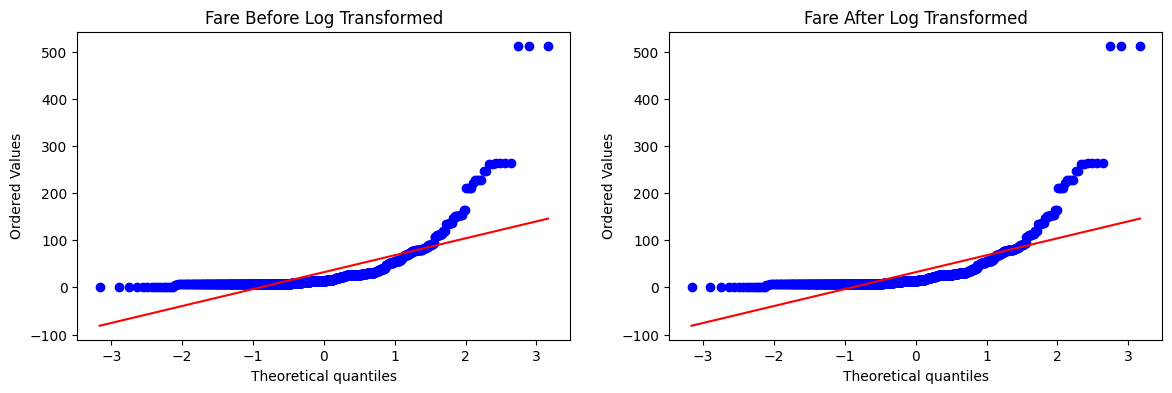

In [40]:
apply_transform(lambda x : x)

Accuracy of LR 0.6442446941323345


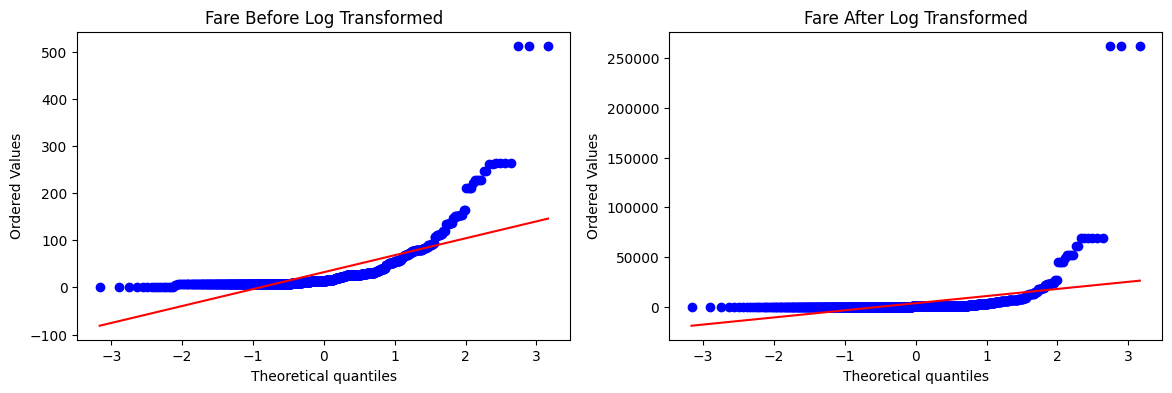

In [41]:
apply_transform(lambda x : x**2)


Accuracy of LR 0.6589013732833957


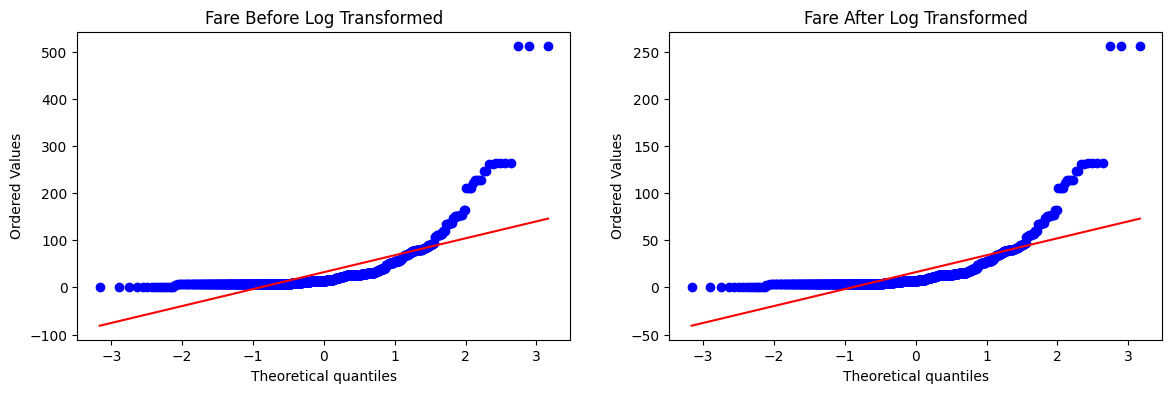

In [44]:
apply_transform(lambda x : x**1/2)


Accuracy of LR 0.61729088639201


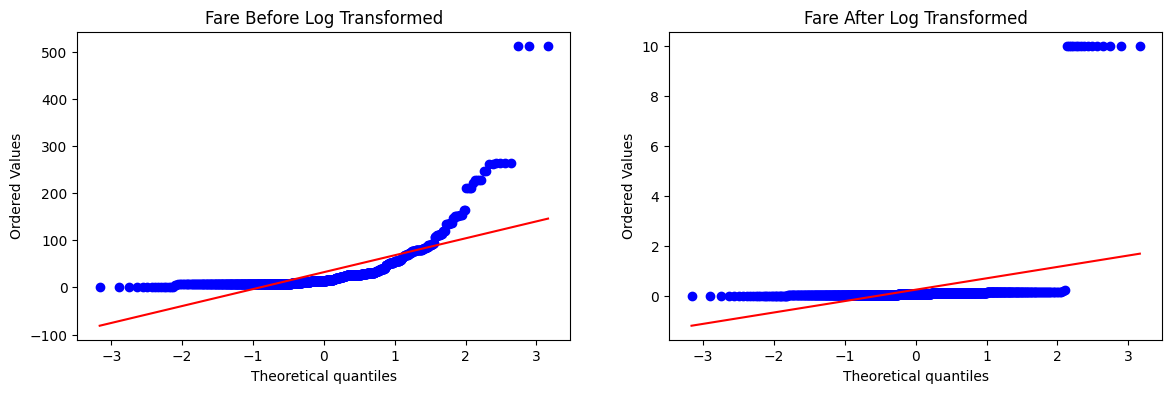

In [46]:
apply_transform(lambda x : 1/(x+0.1))


In [47]:
#above transformed we see that right skewd distribuation are give better result with log transformed